In [2]:
#Importing the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import the dataset
df = pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [4]:
#Checking the head of the dataset
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
#Checking the tail of the dataset
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
#Renaming the columns
df.columns = ["Month", "Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
#Dropping the two rows in the dataset with NaN values
df.drop(106, axis = 0, inplace = True)
df.drop(105, axis = 0, inplace = True)
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [8]:
#Converting the "Month" column to Date Time format for Time-Series Analysis
df['Month'] = pd.to_datetime(df['Month'])

In [9]:
#Checking the head of the dataset
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [10]:
#Setting the "Month" column as the index of the table
df.set_index('Month', inplace = True)

In [11]:
#Checking the head of the dataset
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [12]:
#Checking some key parameters of the Sales column (which has to be forecasted)
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

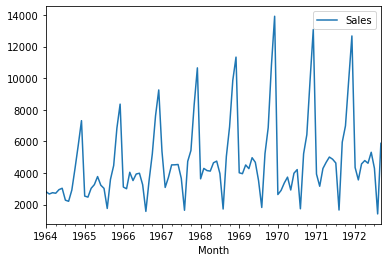

In [13]:
#PLotting the sales per yearwise
df.plot()

In [14]:
#Importing the adfuller function to see whther the data is stationary or non-stationary
from statsmodels.tsa.stattools import adfuller

In [15]:
#Applying the adfuller function to the Sales Dataset
test_result = adfuller(df['Sales'])

In [16]:
#Applying the adfuller logic with H0 as the Null Hypothesis and H1 as the Alternative Hypothesis
#H0: Data is non-stationary
#H1: Data is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistics', 'p-value', 'No. of Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ': ' + str(value))
    if(result[1]) <= 0.05:
        print("\nStrong evidence against the null hypothesis(H0). Reject the Null Hypothesis.")
    else:
        print("\nWeak evidence against the null hypothesis(H0). Accept the Alternative Hypothesis")

In [17]:
#Applying our custom adfuller test to the Sales Dataset
adfuller_test(df['Sales'])

ADF Test Statistics: -1.8335930563276217
p-value: 0.3639157716602457
No. of Lags Used: 11
Number of Observations Used: 93

Weak evidence against the null hypothesis(H0). Accept the Alternative Hypothesis


In [18]:
#Converting the non-stationary data to stationary data
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [19]:
#Creating a seasonal shift column because one season here is one year and one year has 12 months (so shifting by 12)
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [20]:
#Checking the head of the dataset
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [21]:
#Applying our custom adfuller test to the Seasonal First Difference Column to see if it is stationary
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistics: -7.626619157213163
p-value: 2.060579696813685e-11
No. of Lags Used: 0
Number of Observations Used: 92

Strong evidence against the null hypothesis(H0). Reject the Null Hypothesis.


<AxesSubplot:xlabel='Month'>

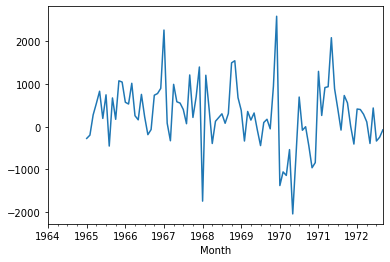

In [22]:
#With proof that the Null hypothesis can be rejected meaning this new column is stationary, plotting a graph for it
df['Seasonal First Difference'].plot()

In [24]:
#Importing the Autocorrection and Partial Autocorrection plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

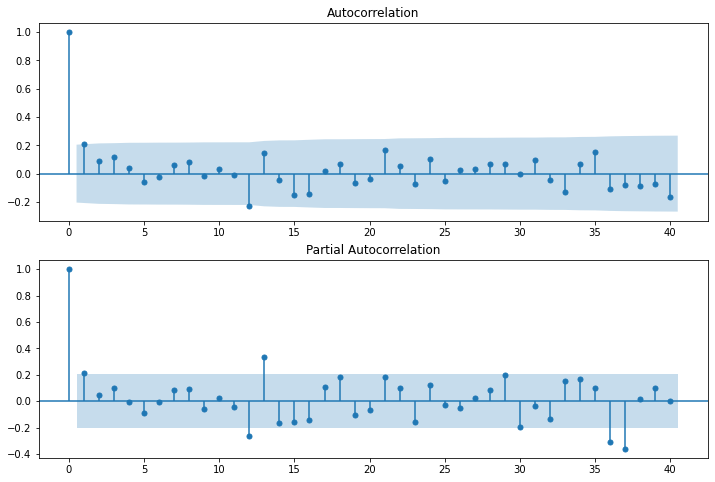

In [26]:
#PLotting the Autocorrection and Partial Autocorrection plots for our Seasonal Column
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:], lags = 40, ax = ax2)

In [27]:
#Importing the ARIMA model (even though ARIMA is used for non-stationary data, we can just experiment with it)
from statsmodels.tsa.arima_model import ARIMA

In [28]:
#Training thr ARIMA model on the Sales data
model = ARIMA(df['Sales'], order = (1, 1, 1))
model_fit = model.fit()

C:\Users\Public\anaconda3\envs\gpuenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Public\anaconda3\envs\gpuenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, s

In [29]:
#Checking the values of the ARIMA model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Fri, 26 Mar 2021   AIC                           1910.251
Time:                        12:12:11   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7823     12.405      1.837      0.066      -1.532      47.096
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

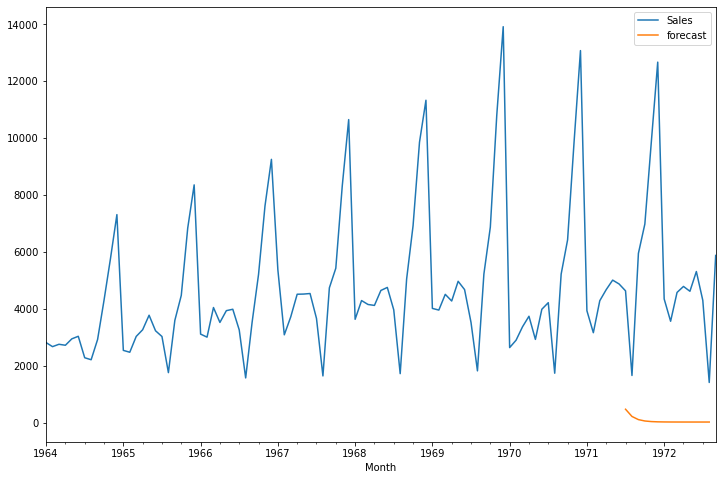

In [30]:
#Forecasting the data using the ARIMA model and comparing it with the actual sales (not at all efficient)
df['forecast'] = model_fit.predict(start = 90, end = 103, dynamic = True)
df[['Sales', 'forecast']].plot(figsize=(12,8))

In [31]:
#Importing the Seasonal ARIMA library
import statsmodels.api as sm

In [32]:
#Training the Seasonal ARIMA library on the Sales data
model = sm.tsa.statespace.SARIMAX(df['Sales'], order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
results = model.fit()

C:\Users\Public\anaconda3\envs\gpuenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Public\anaconda3\envs\gpuenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='Month'>

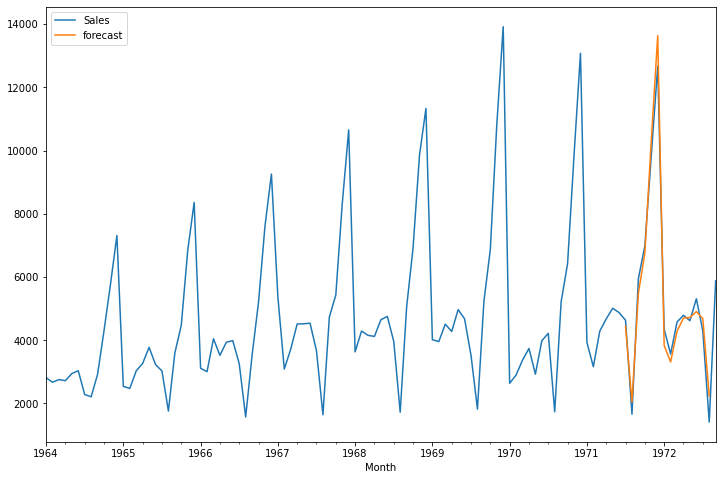

In [36]:
#Forecasting the data using the Seasonal ARIMA model and comparing it with the actual sales (much better)
df['forecast'] = results.predict(start = 90, end = 103, dynamic = True)
df[['Sales', 'forecast']].plot(figsize=(12,8))

In [37]:
#Creating 24 future months for prediction
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0, 24)]

In [39]:
#Converting the future dates to a DataFrame
future_dates_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [40]:
#Checking the tail of the Future Dates Table
future_dates_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [44]:
#Merging the actual dataset with the future sales table
future_df = pd.concat([df, future_dates_df]) 

<AxesSubplot:>

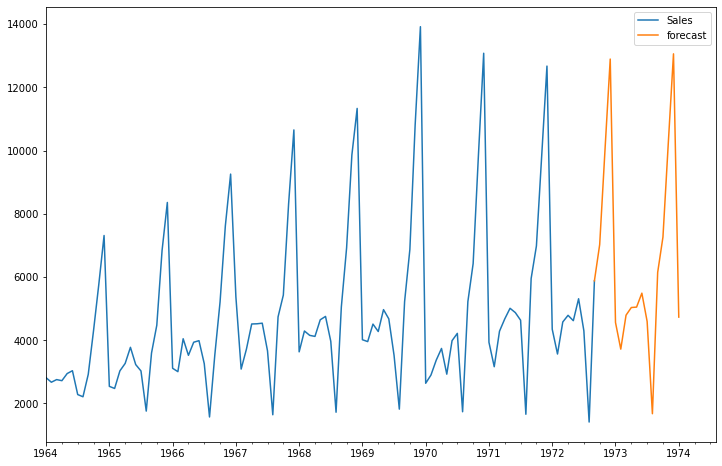

In [45]:
#Forecasting the future sales
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic = True)
future_df[['Sales', 'forecast']].plot(figsize = (12, 8))